# Problem 1: Bandits (15 points)

In this problem you'll experiment with upper confidence bound (UCB) action selection for a multi-armed bandit (MAB) problem. The reward of each arm is drawn from a normal distribution with a different mean and unit variance. The agent does not know how the arm rewards are distributed, and the goal is to maximize the sum of rewards it receives over time.

The function below defines a three-armed bandit with the provided mean parameters. After trying each action once, the agent follows UCB to try an action 1000 more times (the exploration weight parameter ```c``` is also provided). When finished, the program prints the number of times each action has been tried, and it plots both the action value estimates and UCB values over time.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

def UCB_bandit(means, c):
  Q = np.empty([1001, len(means)])
  Q[0,:] = np.array([np.random.normal(mu, 1) for mu in means])
  #print (Q)
  N = np.ones(len(means))
  UCB = np.empty([1000, len(means)])

  for i in range(1,1001):
    UCB[i-1,:] = c*np.sqrt(np.divide(np.log(i),N))
    a = np.argmax(Q[i-1,:] + UCB[i-1,:])
    r = np.random.normal(means[a], 1)
    Q[i,:] = Q[i-1,:]
    Q[i,a] = (Q[i,a]*N[a] + r) / (N[a] + 1)
    N[a] += 1
    
  print("N: ", N)

  plt.figure()
  for i in range(len(means)):
    plt.plot(range(0,1001), Q[:,i], label="action "+str(i));
  plt.legend();
  plt.title("Q_t vs t");

  plt.figure()
  for i in range(len(means)):
    plt.plot(range(1,1001), UCB[:,i], label="action "+str(i));
  plt.legend();
  plt.title("UCB vs t");

N:  [  1.   4. 998.]


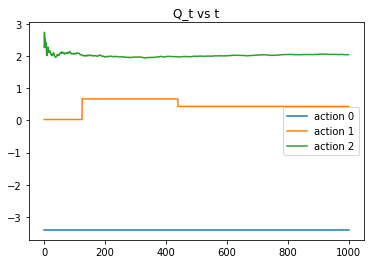

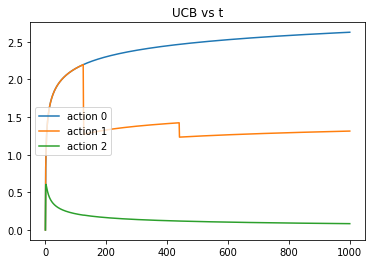

In [ ]:
UCB_bandit([-2,0,2], 1)
# UCB_bandit([0,0,0], 1)
# UCB_bandit([0,0,0], 5)

N:  [ 96. 735. 172.]


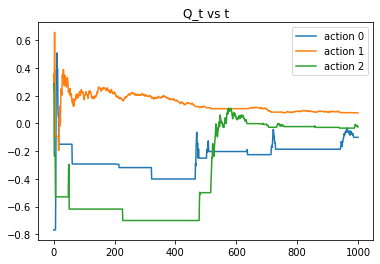

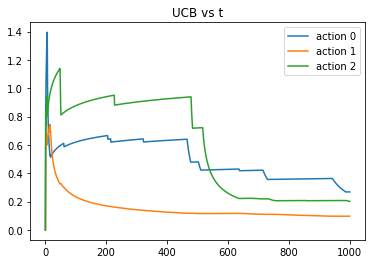

In [ ]:
UCB_bandit([0,0,0], 1)

N:  [314. 362. 327.]


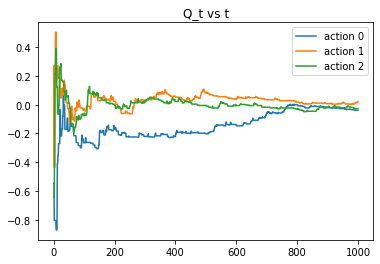

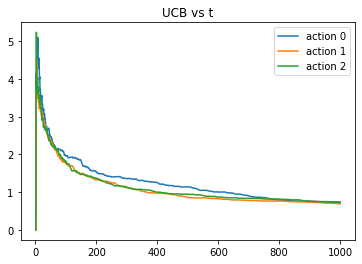

In [ ]:
UCB_bandit([0,0,0], 5)

Run ```UCB_bandit``` for each set of parameters above. You should run each scenario at least a few times to get a sense of what the results tend to look like, since the bandit rewards are not fixed. Then briefly describe your observations.

1.  Run ```UCB_bandit``` with the parameters ```([-2,0,2],1)```. Which $Q_t$ sample estimates converge to the true mean values $Q^*$, and why do they not all converge? Of the UCB values, which generally decrease and which generally increase over time? Explain the presence of any discontinuous "jumps" that you see along these curves.

2.  Experiment with the parameters ```([0,0,0],1)```. Again, be sure to run the simulation several times. Do the convergence of the $Q_t$ values and behavior of the UCB values appear to be consistent over different runs? Why or why not? Comment on the observed distribution of ```N```, the numbers of times each action is tried.

3.  Experiment with the parameters ```([0,0,0],5)``` and answer the same questions as in the previous part. How does this different value of the ```c``` parameter change the simulation results and how many times each action is tried?


ENTER YOUR RESPONSES HERE

1. 
Action 2's Qt sample estimates converge to the true mean values. They do not all converge because for our three-armed bandit machine with parameter ([-2,0,2],1), we don't have much time going for action 0 or action 1. For this current run of the code, the print out value N tells us that we have only 1 time exploring action 0, and 4 times trying action 1, whereas we have 998 times going for action_2. 

For the UCB values, action 2 generally decrease whereas action 0 and action 1 generally increase over time. 

For action 1, they are a few jumps on both Q_t vs t and UCB vs t graphs. They are caused by the exploration. In this current run, we have 4 times trying action 1. Count the number of jumps in the graph, we find they are exactly  4 jumps there. 
Also, notice in the code, we have:
    Q[i,:] = Q[i-1,:]
    Q[i,a] = (Q[i,a]*N[a] + r) / (N[a] + 1)
    where a is the action we try on term i.
It gives us that if we don't go action a, we won't change the Q value. If we go action a, we updated Q with a new value. Since mostly we try action 2, so it seems to be smoother. Since we try action 1 only 4 times in this case, it seems to be "jumps" on the graphs. 
2. 
No, the convergence of Q_t and the behavior of UCB values do not consist over different runs. This is because, each different runs would give us a different N values, which represents how many times we try different actions. I've encountered a few cases where one action has only 17 times trying, and because of less of running times, it does not converge to Q* = 0. One reason that makes N different each run is that we are doing random number generating for both initial Q values and reward. So sometimes we get big reward for one action and small reward for another, and it ends up culmulatively making Q values varies, which would effect the next action selections. 
3. 
Yes, they both consist. This is because this time we get roughly 333 times for each actions so that they can have enough runtimes to converge to the true mean. Different from problem 2, we change the c value to be 5. This makes the UCB values count more on action selection. This increases the exploration weight parameter, so that we have more chance exploring other actions even if randomness sometimes produce different reward for different actions while we know they are basicly the same (with same mean and variance). In this case, our three-armed bandit machine would in the end discover that actually three actions are basicly the same. So it would evenly choose three of the actions and make them all converge to the true mean values. 


In the run, we get 314, 362, 327 for action 1, 2, 3. 

# Problem 2: Race Car MDP (15 points)

Let's revisit the race car MDP from the lecture. There are three states, of which "overheated" is a terminal state. The other two states each have two valid actions, "fast" and "slow".

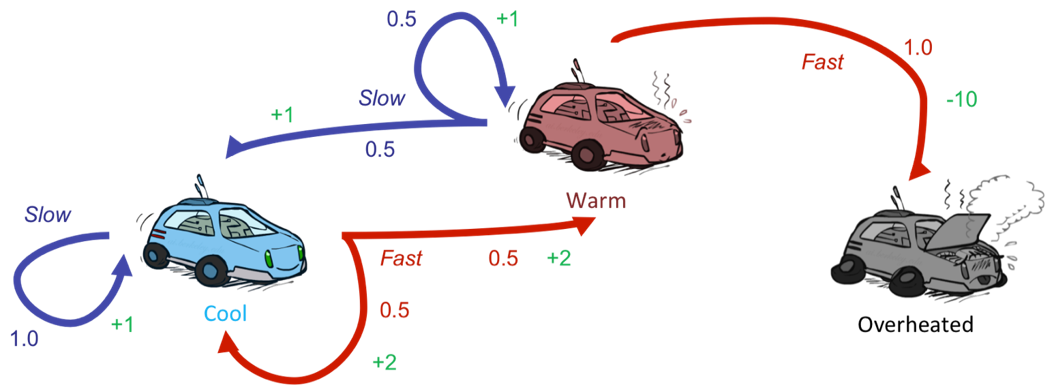

1. Write down and solve a system of linear equations that would give us the state values for the policy of going slow in both the cool and warm states. Use $\gamma = 0.8$ and assume that $V^\pi(\text{overheated}) = 0$.

2. Use the values you found above to "improve" the given policy. Be sure to write down the equations you use. The two steps above constitute one round of policy iteration.

ENTER YOUR SOLUTIONS HERE

1.  
V(cool) = 1.0 * (+1 + 0.8 * V(cool))
V(warm) = 0.5 * (+1 + 0.8 * V(cool)) + 0.5 * (+1 + 0.8* V(warm))
V(overheated) = 0

V(cool) = 5.0
V(warm) = 5.0
V(overheated) = 0.0

2.  
𝜋*(cool) = argmax(1.0*(+1+0.8*v(cool)) (slow), 
         0.5*(+2+0.8*v(cool))+0.5*(+2+0.8*v(warm)) (fast))
         = argmax(5 (slow), 6 (fast))
         = fast
𝜋*(warm) = argmax(0.5*(+1+0.8*v(cool))+0.5*(+1+0.8*v(warm)) (slow), 1.0*(-10+0.8*v(overheated)) (fast))
= argmax(5 (slow), -10 (fast)) 
= slow

# Cliffworld

In this assignment you will explore sequential decision making in the gridworld with a cliff, or the "cliffworld". As shown in the accompanying figure, the cliffworld is a 4 by 12 grid, where the bottom row consists of a "cliff" along with a start and a goal. We would like our agent to learn to get from start to goal without falling into the cliff. All transitions incur a living reward of -1, except for transitions out of the cliff which incur a cost of -100. The goal state is terminal and has no associated actions.

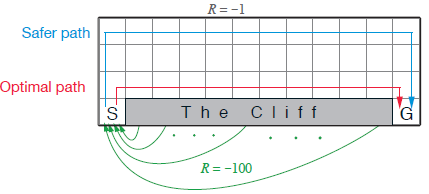

This problem is naturally represented as a MDP with each traversable cell as a state. Actions are left (<), right (>), up (^), and down (v); cliff states ('C') only have the action of teleporting to the start state. These are enumerated by the ```actions``` function . The cardinal direction actions are noisy; the agent moves in its intended direction with probability $p$ and in the two adjacent directions with probability $\frac12(1-p)$ each. When the agent moves into a wall, it stays in its original state. 

We have encoded all of this information for you in the ```Qvalue``` function below. A ```state``` is represented as a tuple of two indices that follow the same convention as a Numpy array; top left is (0,0), start is (3,0), and goal is (3,11). Given a ```state```, an ```action```, and a 2D numpy array of ```values```, the function computes the Q-value of taking ```action``` from ```state```, taking into account uncertainties, rewards, and successor state values. A discount factor ```gamma``` may also be applied.

In [2]:
import numpy as np
from matplotlib import pyplot as plt

def actions(state):
  if state == (3,11): return ['G']
  if state[0] == 3 and 0 < state[1] < 11: return ['C']
  return ['<', '>', '^', 'v']

def Qvalue(state, action, values, p, gamma):
  """
  Compute the Q-value for the given state-action pair,
  given a set of values for the problem, with successful transition
  probability p and discount factor gamma.
  """
  i,j = state
  gV = gamma*values
  pn = (1-p)/2

  # Handle goal and cliff states
  if action == 'G':
    return 0
  if action == 'C':
    return -100 + gV[(3,0)]

  # All possible successor states
  left = (i,max(j-1,0))
  right = (i,min(j+1,11))
  up = (max(i-1,0),j)
  down = (min(i+1,3),j)

  # Q-value computation
  if action == '<':
    return p*(-1+gV[left]) + pn*(-1+gV[up]) + pn*(-1+gV[down])
  elif action == '>':
    return p*(-1+gV[right]) + pn*(-1+gV[up]) + pn*(-1+gV[down])
  elif action == '^':
    return p*(-1+gV[up]) + pn*(-1+gV[left]) + pn*(-1+gV[right])
  else:
    return p*(-1+gV[down]) + pn*(-1+gV[left]) + pn*(-1+gV[right])

## Coding 1 (15 points)

Value iteration can be used to obtain the optimal values for each state. Recall that the Bellman update, if using state-action values to update state values, looks like the following:

$$ V_{i+1}(s) \leftarrow \max_a Q_i(s,a) $$

Implement value iteration in the function below. An initial 2D array of ```values``` is provided, as well as the ```p``` and ```gamma``` parameters that ```Qvalue``` requires. The function should iteratively sweep over all state values and update them using the Bellman update; be sure that your updates are synchronous, which means that you should distinguish "new" and "old" values within a sweep. The process finishes when the maximum absolute difference in values between two successive sweeps is lower than ```threshold```. You should append each successive maximum difference to the growing list ```max_diffs```, such that the last element in each sweep (the -1 element) is the most recent difference.

When finished, return the final array of converged state values, as well as the list ```max_diffs```.

In [107]:
def value_iteration(values, p, gamma, threshold=1e-6):
  """
  INPUTS: An initial 2D Numpy array of state values, p and gamma parameters, 
  and stopping threshold for value iteration
  OUTPUTS: Converged 2D Numpy array of state values, list of max diffs between
  successive iterations
  """
  max_diffs = [float("inf")]
  t = 0
  v_old = np.copy(values)
  while max_diffs[-1] >= threshold:
    # YOUR CODE HERE
    values = np.copy(values)
    for i in range(len(values)):
      for j in range(len(values[0])):
        state = i,j 
        tmp = []
        for act in actions(state):
          tmp.append(Qvalue(state,act,values,p,gamma))
        values[i,j] = max(tmp)
    max_diffs.append(np.max(np.abs(values - v_old)))
    v_old = np.copy(values) 
  return values, max_diffs

Now that we can compute optimal values, we can extract an optimal policy as well. Recall that this can be done using Q-values as follows:

$$ \pi^*(s) = \text{argmax}_a Q(s,a) $$

We've implement this for you in ```extract_policy``` below. Following that we also have a wrapper function that uses both functions to find the optimal values and policy together and prints them both out. 

In [108]:
def extract_policy(values, p, gamma):
  # Extract the optimal policy associated with the given optimal values
  policy = np.empty(values.shape, dtype=object)
  for i in range(4):
    for j in range(12):
      best_value = -float("inf")
      for a in actions((i,j)):
        new_value = Qvalue((i,j), a, values, p, gamma)
        if new_value > best_value:
          best_value = new_value
          policy[i,j] = a
  return policy

def solve_cliffworld(p, gamma):
  # Find and show the optimal values and policy for the given parameters
  values, diffs = value_iteration(np.zeros((4,12)), p, gamma)
  policy = extract_policy(values, p, gamma) 

  np.set_printoptions(linewidth=100)
  print(np.round(values,2),"\n")
  print(policy,"\n")
  plt.plot(np.arange(1,len(diffs)-1), diffs[2:])
  plt.title("Max difference in values in each iteration")

You'll be running the following code cell for different values of ```p``` and ```gamma``` and analyzing the outputs, which consist of the optimal state values, the optimal policy, and a plot showing how ```max_diff``` varies over time (starting from the second iteration, since the first set of differences will be quite large). To check that your value iteration is implemented correctly, the values for $p=1$ and $\gamma=1$ are as follows:

```
[[ -14.  -13.  -12.  -11.  -10.   -9.   -8.   -7.   -6.   -5.   -4.   -3.]
 [ -13.  -12.  -11.  -10.   -9.   -8.   -7.   -6.   -5.   -4.   -3.   -2.]
 [ -12.  -11.  -10.   -9.   -8.   -7.   -6.   -5.   -4.   -3.   -2.   -1.]
 [ -13. -113. -113. -113. -113. -113. -113. -113. -113. -113. -113.    0.]]
```



[[ -14.  -13.  -12.  -11.  -10.   -9.   -8.   -7.   -6.   -5.   -4.   -3.]
 [ -13.  -12.  -11.  -10.   -9.   -8.   -7.   -6.   -5.   -4.   -3.   -2.]
 [ -12.  -11.  -10.   -9.   -8.   -7.   -6.   -5.   -4.   -3.   -2.   -1.]
 [ -13. -113. -113. -113. -113. -113. -113. -113. -113. -113. -113.    0.]] 

[['>' '>' '>' '>' '>' '>' '>' '>' '>' '>' '>' 'v']
 ['>' '>' '>' '>' '>' '>' '>' '>' '>' '>' '>' 'v']
 ['>' '>' '>' '>' '>' '>' '>' '>' '>' '>' '>' 'v']
 ['^' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'G']] 



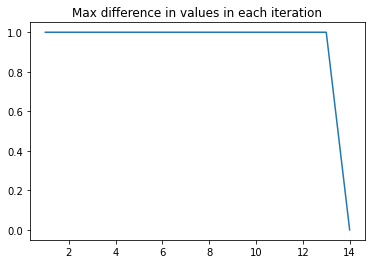

In [109]:
p = 1
gamma = 1
solve_cliffworld(p, gamma)

[[ -36.48  -34.11  -31.65  -29.17  -26.69  -24.21  -21.76  -19.35  -17.02  -14.84  -12.95  -11.56]
 [ -37.23  -35.01  -32.61  -30.14  -27.64  -25.12  -22.58  -20.01  -17.37  -14.62  -11.73   -8.86]
 [ -38.4   -36.73  -34.51  -32.1   -29.62  -27.1   -24.55  -21.95  -19.22  -16.18  -12.27   -5.42]
 [ -42.4  -142.4  -142.4  -142.4  -142.4  -142.4  -142.4  -142.4  -142.4  -142.4  -142.4     0.  ]] 

[['>' '>' '>' '>' '>' '>' '>' '>' '>' '>' '>' 'v']
 ['>' '>' '>' '>' '>' '>' '>' '>' '>' '>' '>' 'v']
 ['^' '^' '^' '^' '^' '^' '^' '^' '^' '^' '^' 'v']
 ['<' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'G']] 



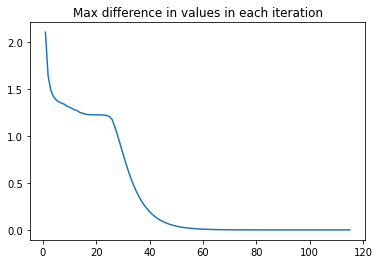

In [110]:
p = 0.5
gamma = 1
solve_cliffworld(p,gamma)

[[  -1.25   -1.25   -1.25   -1.25   -1.25   -1.25   -1.25   -1.25   -1.25   -1.25   -1.25   -1.24]
 [  -1.25   -1.25   -1.25   -1.25   -1.25   -1.25   -1.25   -1.25   -1.25   -1.25   -1.24   -1.2 ]
 [  -1.25   -1.25   -1.25   -1.25   -1.25   -1.25   -1.25   -1.25   -1.25   -1.24   -1.2    -1.  ]
 [  -1.25 -100.25 -100.25 -100.25 -100.25 -100.25 -100.25 -100.25 -100.25 -100.25 -100.25    0.  ]] 

[['<' '<' '<' '<' '>' '>' '>' '>' '>' '>' '>' 'v']
 ['<' '<' '<' '>' '>' '>' '>' '>' '>' '>' '>' 'v']
 ['<' '<' '>' '>' '>' '>' '>' '>' '>' '>' '>' 'v']
 ['<' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'G']] 



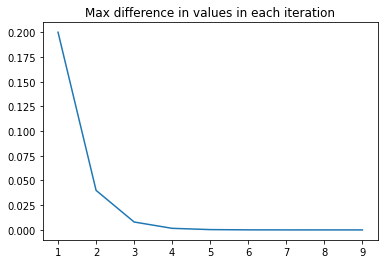

In [122]:
p = 1
gamma = 0.2
solve_cliffworld(p,gamma)

## Response 1 (15 points)
1. How do the state values change when you a) decrease $p$ and keep $\gamma$ fixed, and b) decrease $\gamma$ and keep $p$ fixed? To get a sense of the full range of possible outputs, remember that both values are lower-bounded by 0. Briefly explain your observations.

2. How does the policy change when you a) decrease $p$ and keep $\gamma$ fixed, and b) decrease $\gamma$ and keep $p$ fixed? Note that the policy is discrete, unlike the values, so you may only see a change occur if you hit a certain threshold in either value. Briefly explain your observations.

3. Can you quantify or bound the rate of decrease in the maximum difference between values between two iterations for $0<\gamma<1$? How does this affect the number of iterations required for convergence?

ENTER YOUR RESPONSES HERE

1. 
a) if we decrease p and keep gamma fixed, the state values would decrease (absolute value would increase). 
This is because if we decrease p and keep gamma fixed, we would have some possible cases exploring the unintended directions. Some of these directions could be to the cliff, which have a large negative number. So this would make state values decrease.

b) if we decrease gamma and keep p fixed, the state values would increase (absolute value would decrease).
This is because if we decrease gamma while fix p, this effect the way we calculate Q_value. More specifically, it reduces the effect of "values" (future reward) while living "reward" remain the same. So based on the calulation of our functions, the state values should increase.


2. 
a) if we decrease p and keep gamma fixed, the policy changes on the third row of the cliff. And it changes for the start place "S".
This is because if we decrease p and keep gamma fixed, we would have some possible cases exploring the unintended directions. Some of these directions could be to the cliff. The policy wants to get away from the cliff. So it learns in this way.

b) if we decrease gamma and keep p fixed, we could observe that on left up part of the cliff, the policy becomes "<". This is because it reduces the effect of "values" (future reward) while living "reward" remain the same. So it becomes more focused on short-term reward, which means it would somehow better to stay in the cliff instead of going to the goal state. 

3.
As we learn in class, 
|v_k+1 - v* |<= gamma * |v_i - v*|
|v_k+1 - v*| <= |gamma^k*|r_max|/(1-gamma)|.

So, 
|v_k+1 - v_k| == |(v_k+1 - v*) - (v_k - v*)| <= 
|v_k+1 - v*| + |v_k - v*| <= 
|gamma^k*|r_max|/(1-gamma)|+|gamma^(k-1)*|r_max|/(1-gamma)| 
is the bound.

For smaller gamma, the number of iterations required for convergence is smaller. 

## Coding 2 (10 points)

You hopefully now have a good understanding of the dynamics of this cliffworld. But our agent may be more clueless--let's suppose it no longer has access to the ```Qvalue``` function (the problem model). To find out what's going on in the world, it will actually have to take actions and learn from them à la reinforcement learning. 

We will use temporal difference learning, which explicitly keeps track of Q-values. These will be stored as a dictionary, where the key is a ```(state, action)``` tuple and the value is the Q-value. 

In RL, an agent has to balance exploitation and exploration. A simple way to do so is to use $\varepsilon$-greedy action selection. Remember that in this scheme, an agent selects a random action with probability $\varepsilon$ and the best action (the one with the highest Q-value in the given state) otherwise. Implement this function below (hint: look at using ```random.random()``` and ```random.choice()```).

In [157]:
import random

def epsilon_greedy_action(Qvalues, state, epsilon):
  # Explore a random action from state with probability epsilon
  # Otherwise, greedily choose the best action
  # Qvalues is a dictionary that looks like {(state, action): q-value}
  
  # YOUR CODE HERE
  k = np.random.random()
  if k < epsilon:
    return np.random.choice(actions(state))
  else:
    tmp = {}
    for a in actions(state):
      tmp[a] = Qvalues[state,a]
    return max(tmp.items(), key=operator.itemgetter(1))[0]
    

During learning, the agent repeatedly takes an action from its current state, observes the successor state and reward, and repeats. If the agent encounters a terminal (here, goal) state, we consider the episode over, and it goes back to the start. The ```step``` function below returns the successor state and associated reward after taking ```action``` from ```state```. This is essentially a black box to the agent, as it has no idea what is inside.

In [147]:
def step(state, action, p):
  # Return successor state and reward upon taking action from state
  i,j = state
  if action == 'C':
    return (3,0), -100

  if action == '<':
    if random.random() < p: return (i,max(j-1,0)), -1
    else: return random.choice([(max(i-1,0),j), (min(i+1,3),j)]), -1
  if action == '>':
    if random.random() < p: return (i,min(j+1,11)), -1
    else: return random.choice([(max(i-1,0),j), (min(i+1,3),j)]), -1
  if action == '^':
    if random.random() < p: return (max(i-1,0),j), -1
    else: return random.choice([(i,max(j-1,0)), (i,min(j+1,11))]), -1
  else:
    if random.random() < p: return (min(i+1,3),j), -1
    else: return random.choice([(i,max(j-1,0)), (i,min(j+1,11))]), -1

In class we talk about two approaches to TD learning: SARSA and Q-learning. The Q-value update for SARSA is as follows:

$$ Q(s,a) \leftarrow Q(s,a) + \alpha(r + \gamma Q(s',a') - Q(s,a)) $$

Remember that $\alpha$ is the learning rate, and that $a'$ is an action selected for $s'$, again using epsilon-greedy selection. ```SARSA``` is implemented for you in its entirety below. Note that it uses the utility function ```extract_policy```, which uses Q-values and overloads the same function defined earlier for value iteration.

In [159]:
def SARSA(Qvalues, p, gamma, alpha, epsilon, episodes=50000):
  # SARSA temporal difference learning using initial Qvalues and given parameters
  # Returns a learned policy (numpy 2d array)
  for i in range(episodes):
    state = (3,0)
    action = epsilon_greedy_action(Qvalues, state, epsilon)
    while state != (3,11):
      next_state, reward = step(state, action, p)
      next_action = epsilon_greedy_action(Qvalues, next_state, epsilon)
      target = Qvalues[(next_state, next_action)]
      Qvalues[(state, action)] += alpha * (reward + gamma*target - Qvalues[(state, action)])
      state = next_state
      action = next_action
  policy = extract_policy(Qvalues)
  return policy

def extract_policy(Qvalues):
  # Extract the optimal policy associated with the given Q-values
  policy = np.empty((4,12), dtype=object)
  for i in range(4):
    for j in range(12):
      policy[i,j] = epsilon_greedy_action(Qvalues, (i,j), 0)
  return policy

## Coding 3 (15 points)

The other temporal difference learning approach is Q-learning, which is very similar to SARSA but uses the following Q-value update:

$$ Q(s,a) \leftarrow Q(s,a) + \alpha(r + \gamma \max_{a'} Q(s',a') - Q(s,a)) $$

Unlike SARSA, Q-learning uses the optimal action in the successor state for the update, even if that's not what the agent actually does. Given the above implementation for SARSA, use it to help with the implementation of ```Qlearner``` below. Note that the code should be very similar between the two; you should only have to change a few lines. You can also compute the action corresponding to the highest Q-value easily by calling ```epsilon_greedy_action``` with ```epsilon``` set to 0 (no exploration).


In [165]:
def Qlearner(Qvalues, p, gamma, alpha, epsilon, episodes=50000):
  # Q-learning using initial Qvalues and given parameters
  # Returns a learned policy (numpy 2d array)  
  # YOUR CODE HERE
  for i in range(episodes):
    state = (3,0)
    action = epsilon_greedy_action(Qvalues, state, epsilon)
    while state != (3,11):
      next_state, reward = step(state, action, p)
      next_action = epsilon_greedy_action(Qvalues, next_state, 0)
      target = Qvalues[(next_state, next_action)]
      Qvalues[(state, action)] += alpha * (reward + gamma*target - Qvalues[(state, action)])
      state = next_state
      action = next_action
  policy = extract_policy(Qvalues)
  return policy


Once you have ```Qlearner``` successfully implemented, you should be able to call the following function to compare the policies learned by each of the two approaches. Note that since reinforcement learning is sample-based, you may not get exactly the same results each time, even with a large number of episodes. So we suggest that you run each trial a few times to get a sense of the average results.


In [166]:
def TD_learn(p, gamma, alpha, epsilon):
  Qvalues = {((i,j),a): 0 for i in range(4) for j in range(12) for a in actions((i,j))}
  policy = SARSA(Qvalues, p, gamma, alpha, epsilon)
  print("SARSA policy")   
  print(policy,"\n")
  
  Qvalues = {((i,j),a): 0 for i in range(4) for j in range(12) for a in actions((i,j))}
  policy = Qlearner(Qvalues, p, gamma, alpha, epsilon)
  print("Q-learning policy")  
  print(policy)

In [167]:
p = 1
gamma = 1
alpha = 0.1
epsilon = 0.2
TD_learn(p, gamma, alpha, epsilon)

SARSA policy
[['>' '>' '>' '>' '>' '>' '>' '>' '>' '>' 'v' 'v']
 ['^' '^' '^' '^' '^' '^' '^' '^' '^' '>' '>' 'v']
 ['^' '^' '^' '^' '^' '^' '^' '^' '^' '>' '>' 'v']
 ['^' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'G']] 

Q-learning policy
[['>' '^' '>' 'v' 'v' 'v' '^' '>' '<' '>' 'v' 'v']
 ['>' '>' '>' '>' '<' '>' '>' '>' '>' '>' '>' 'v']
 ['>' '>' '>' '>' '>' '>' '>' '>' '>' '>' '>' 'v']
 ['^' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'G']]


In [168]:
p = 0.8
gamma = 1
alpha = 0.1
epsilon = 0.2
TD_learn(p, gamma, alpha, epsilon)

SARSA policy
[['>' '>' '>' '>' '>' '>' '>' '>' '>' '>' '>' 'v']
 ['^' '^' '^' '^' '^' '^' '^' '^' '^' '^' '^' 'v']
 ['^' '^' '^' '^' '^' '^' '^' '^' '^' '^' '^' 'v']
 ['^' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'G']] 

Q-learning policy
[['>' '>' '>' '>' '>' '>' '>' '>' '>' '>' '>' 'v']
 ['^' '>' '>' '>' '>' '>' '>' '>' '>' '>' '>' 'v']
 ['^' '^' '^' '^' '^' '^' '^' '^' '^' '^' '^' 'v']
 ['<' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'G']]


In [169]:
p = 1
gamma = 1
alpha = 0.8
epsilon = 0.2
TD_learn(p, gamma, alpha, epsilon)

SARSA policy
[['>' '>' '>' '>' '>' 'v' '^' '>' '>' '>' '>' '^']
 ['^' 'v' '>' '^' '^' '>' '>' '^' '>' '^' '^' 'v']
 ['>' '>' '^' '<' '>' '>' '^' '^' '^' '^' '>' 'v']
 ['^' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'G']] 

Q-learning policy
[['<' '>' 'v' '>' '^' 'v' 'v' '>' '<' '>' '>' 'v']
 ['^' '^' '^' '>' '>' '>' '^' '>' 'v' 'v' 'v' 'v']
 ['>' '>' '>' '>' '>' '>' '>' '>' '>' '>' '>' 'v']
 ['^' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'G']]


## Response 2 (15 points)

1. Compare the results of SARSA and Q-learning for the given parameters (specifically, $p = \gamma = 1$). The former outputs a "safer route" by going all the way up and around, while the latter outputs the optimal route by hugging the cliff (since this scenario is deterministic, only the states along the path between the start and goal states matter). Explain why even though the underlying model and environment are the same in each. What happens if we set $\varepsilon$ to 0? Why?

2. Reset $\varepsilon$ to 0.2 and change the underlying model by decreasing $p$ to 0.8. Which of the policies changes and why? 

3. Set $p$ back to 1. Which learning method is most impacted if we make the learning rate $\alpha$ very high (e.g., 0.8) and why?

ENTER YOUR RESPONSES HERE

1. 
Even if the underlying model and environment are the same for SARSA and Q-learning, SARSA learns a safer way while Q-learning learns the optimal but much dangerous way. This is because for SARSA, for each update, it directly use ε-greedy behavior policy to get the next action and use that action to calculate Q_value while for Q-Learning, it chooses the action that max the Q_value to update for each iteration. So for Q-learning, it always choose the best action that would max the Q_value. So it would learn the optimal but dangerous way.

If we set epsilon to 0, then SARSA and Q-learning become the same. And both would choose the optimal way as Q-learning does. Because in our epsilon_greedy_action function, if epsilon = 0, then we would always choose the best action (the one with the highest Q-value in the given state)
2. 
Q-learning changes. Because if we decrease p value, we would have more chance exploring while calculating the Q_value. 
For Q-learning, each update, it would choose the best action. If we decrease p value, the best action would be get away from the cliff. So it learns the policy in that way instead.
3. 
SARSA is more impacted. This is because if we raise up the learning rate, in general, it would fast the convergence. However, SARSA does not have the max selection steps. So it means it would try more actions to converge to the safer routine. So SARSA is more impacted. 